# Quantum Tower Defense - Understanding Quantum Mechanics

## Introduction to Quantum Computing Concepts

This notebook introduces the quantum mechanics concepts used in Quantum Tower Defense.

**Learning Objectives:**
- Understand quantum superposition
- Learn about wave function collapse through measurement
- Explore quantum entanglement
- Apply phase gates for probability manipulation

In [2]:
# Import required libraries
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, circuit_drawer
from qiskit.quantum_info import Statevector

print("Quantum Tower Defense - Educational Notebook")
print("IBM Qiskit Version:", qiskit.__version__)

Quantum Tower Defense - Educational Notebook
IBM Qiskit Version: 1.0.0


## 1. Quantum Superposition

In the game, enemies exist in **superposition** across multiple paths simultaneously.

### What is Superposition?
A quantum state can exist in multiple states at once until measured.

In [3]:
# Create a 2-qubit circuit (represents 4 paths)
qc = QuantumCircuit(2)

# Apply Hadamard gates to create equal superposition
qc.h(0)  # First qubit
qc.h(1)  # Second qubit

# This creates: |00⟩ + |01⟩ + |10⟩ + |11⟩
# Which means: Path 0 + Path 1 + Path 2 + Path 3

print("Quantum Circuit for Enemy Superposition:")
print(qc.draw())

# Get the statevector
statevector = Statevector(qc)
print("\nState Vector:")
print(statevector)

# Get probabilities
probs = statevector.probabilities()
print("\nPath Probabilities:")
for i, prob in enumerate(probs):
    print(f"Path {i}: {prob*100:.1f}%")

Quantum Circuit for Enemy Superposition:
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

State Vector:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))

Path Probabilities:
Path 0: 25.0%
Path 1: 25.0%
Path 2: 25.0%
Path 3: 25.0%


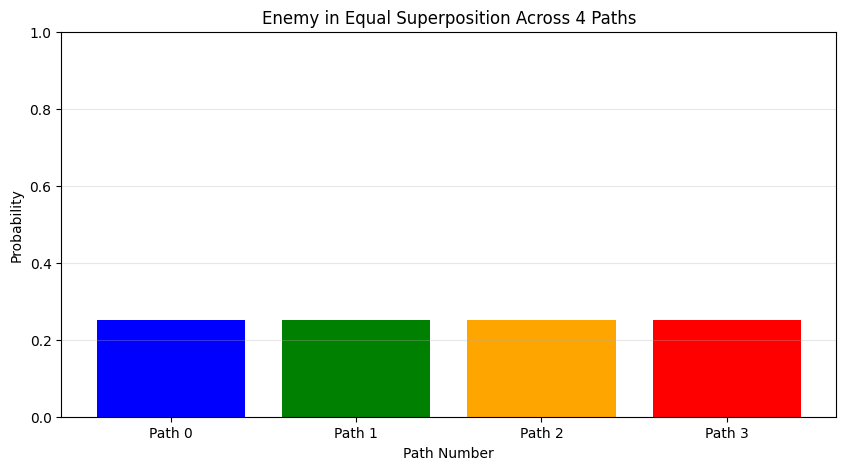

In [4]:
# Visualize the superposition
plt.figure(figsize=(10, 5))
plt.bar(range(4), probs, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Path Number')
plt.ylabel('Probability')
plt.title('Enemy in Equal Superposition Across 4 Paths')
plt.xticks(range(4), ['Path 0', 'Path 1', 'Path 2', 'Path 3'])
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 2. Quantum Measurement (Wave Function Collapse)

When a **Measurement Tower** observes an enemy, the superposition collapses to a single path.

In [5]:
# Create circuit with measurement
qc_measure = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits
qc_measure.h(0)
qc_measure.h(1)
qc_measure.measure([0, 1], [0, 1])  # Measure both qubits

print("Circuit with Measurement:")
print(qc_measure.draw())

# Simulate measurement
simulator = AerSimulator()
job = simulator.run(qc_measure, shots=1000)
result = job.result()
counts = result.get_counts()

print("\nMeasurement Results (1000 trials):")
for state, count in counts.items():
    path = int(state, 2)  # Binary to decimal
    print(f"Path {path} (|{state}⟩): {count} times ({count/10:.1f}%)")

# Visualize
plot_histogram(counts, title='Measurement Results - Enemy Path Collapse')
plt.show()

Circuit with Measurement:
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 

Measurement Results (1000 trials):
Path 0 (|00⟩): 260 times (26.0%)
Path 1 (|01⟩): 246 times (24.6%)
Path 2 (|10⟩): 259 times (25.9%)
Path 3 (|11⟩): 235 times (23.5%)


In [6]:
# Single measurement (what happens in game)
job_single = simulator.run(qc_measure, shots=1)
result_single = job_single.result()
counts_single = result_single.get_counts()

measured_state = list(counts_single.keys())[0]
measured_path = int(measured_state, 2)

print(f"\n🎯 Measurement Tower activated!")
print(f"Enemy collapsed from superposition to Path {measured_path}")
print(f"Binary state: |{measured_state}⟩")


🎯 Measurement Tower activated!
Enemy collapsed from superposition to Path 2
Binary state: |10⟩


## 3. Quantum Entanglement

**Entangled Enemy Pairs** share quantum correlation - damage to one affects the other!

In [7]:
# Create Bell State (maximally entangled pair)
qc_entangled = QuantumCircuit(4, 4)  # 2 enemies × 2 qubits each

# Enemy 1: Create superposition
qc_entangled.h(0)
qc_entangled.h(1)

# Entangle with Enemy 2 using CNOT gates
qc_entangled.cx(0, 2)  # Entangle qubit 0 with qubit 2
qc_entangled.cx(1, 3)  # Entangle qubit 1 with qubit 3

print("Entangled Enemy Pair Circuit:")
print(qc_entangled.draw())

# Measure both enemies
qc_entangled.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Simulate
job_entangled = simulator.run(qc_entangled, shots=1000)
result_entangled = job_entangled.result()
counts_entangled = result_entangled.get_counts()

print("\nEntangled Measurement Results:")
for state, count in sorted(counts_entangled.items(), key=lambda x: -x[1])[:5]:
    enemy1_state = state[2:4]  # Last 2 bits
    enemy2_state = state[0:2]  # First 2 bits
    path1 = int(enemy1_state, 2)
    path2 = int(enemy2_state, 2)
    print(f"Enemy 1 on Path {path1}, Enemy 2 on Path {path2}: {count} times")

plot_histogram(counts_entangled, title='Entangled Enemy Pairs - Correlated Paths')
plt.show()

Entangled Enemy Pair Circuit:
     ┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐  │  
q_2: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘
c: 4/═══════════════
                    

Entangled Measurement Results:
Enemy 1 on Path 2, Enemy 2 on Path 2: 262 times
Enemy 1 on Path 3, Enemy 2 on Path 3: 256 times
Enemy 1 on Path 1, Enemy 2 on Path 1: 252 times
Enemy 1 on Path 0, Enemy 2 on Path 0: 230 times


## 4. Phase Gates (Probability Manipulation)

**Phase Towers** apply phase rotations to reduce probability on specific paths.

Before Phase Tower:
Path probabilities: ['25.0%', '25.0%', '25.0%', '25.0%']

🔄 Phase Tower applied to Path 2!
Path probabilities: ['25.0%', '25.0%', '25.0%', '25.0%']


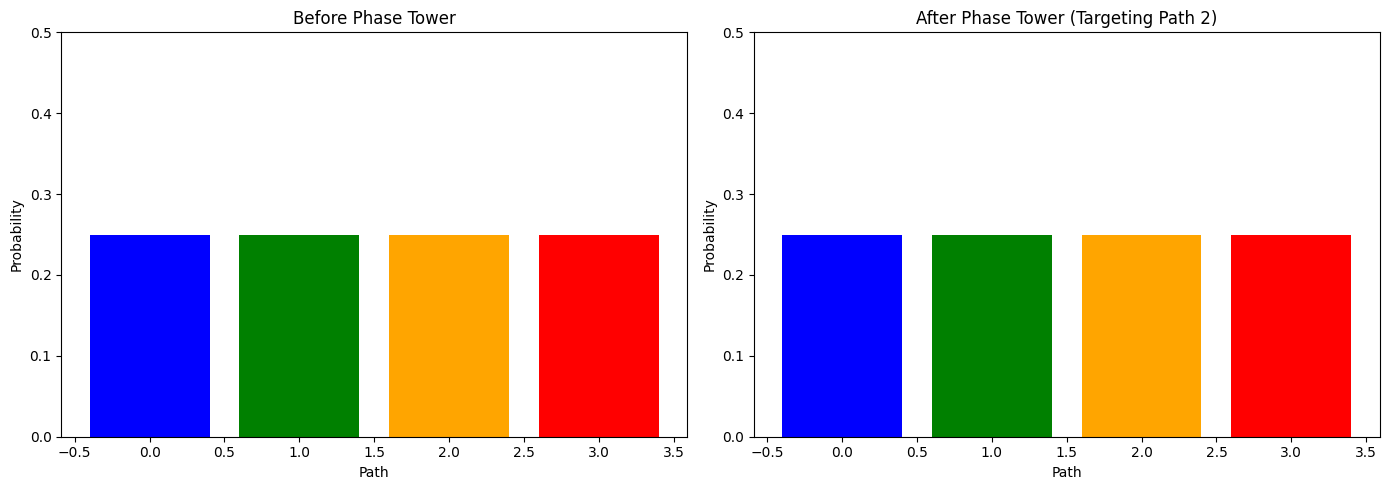

In [8]:
# Create superposition
qc_phase = QuantumCircuit(2)
qc_phase.h(0)
qc_phase.h(1)

print("Before Phase Tower:")
statevector_before = Statevector(qc_phase)
probs_before = statevector_before.probabilities()
print("Path probabilities:", [f"{p*100:.1f}%" for p in probs_before])

# Apply phase rotation to Path 2 (state |10⟩)
# To target |10⟩, we need qubit 1 = 1 and qubit 0 = 0
qc_phase.x(0)  # Flip qubit 0 (now targets |11⟩)
qc_phase.mcp(np.pi, [0], 1)  # Controlled phase
qc_phase.x(0)  # Flip back

print("\n🔄 Phase Tower applied to Path 2!")
statevector_after = Statevector(qc_phase)
probs_after = statevector_after.probabilities()
print("Path probabilities:", [f"{p*100:.1f}%" for p in probs_after])

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(range(4), probs_before, color=['blue', 'green', 'orange', 'red'])
ax1.set_xlabel('Path')
ax1.set_ylabel('Probability')
ax1.set_title('Before Phase Tower')
ax1.set_ylim(0, 0.5)

ax2.bar(range(4), probs_after, color=['blue', 'green', 'orange', 'red'])
ax2.set_xlabel('Path')
ax2.set_ylabel('Probability')
ax2.set_title('After Phase Tower (Targeting Path 2)')
ax2.set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

## 5. Game Application Summary

### How Quantum Mechanics Creates Gameplay:

| Quantum Concept | Qiskit Implementation | Game Mechanic |
|----------------|----------------------|---------------|
| **Superposition** | Hadamard gates (H) | Enemy exists on multiple paths |
| **Measurement** | `circuit.measure()` | Measurement Tower collapses enemy |
| **Entanglement** | CNOT gates (CX) | Entangled pairs share damage |
| **Phase Rotation** | Phase gates (P) | Phase Tower shifts probabilities |
| **Decoherence** | Time evolution | Quantum coherence resource drain |

### Strategic Implications:

1. **Unmeasured enemies** are harder to hit but cost coherence
2. **Measurement** makes enemies vulnerable but reveals their path
3. **Phase towers** can "steer" enemies away from dangerous paths
4. **Entangled pairs** take correlated damage (attack one, hurt both!)

In [9]:
# Interactive example: Simulate a game turn
print("🎮 QUANTUM TOWER DEFENSE - SIMULATION\n")
print("Turn 1: Enemy spawns in superposition")

# Enemy in superposition
enemy_qc = QuantumCircuit(2)
enemy_qc.h(0)
enemy_qc.h(1)
probs = Statevector(enemy_qc).probabilities()
print(f"  Enemy probability: {[f'{p*100:.0f}%' for p in probs]}")

print("\nTurn 2: Phase Tower targets Path 3")
# Apply phase to path 3 (|11⟩)
enemy_qc.p(np.pi/2, 0)
enemy_qc.p(np.pi/2, 1)
probs = Statevector(enemy_qc).probabilities()
print(f"  Enemy probability: {[f'{p*100:.0f}%' for p in probs]}")

print("\nTurn 3: Measurement Tower activates")
enemy_qc.measure_all()
result = simulator.run(enemy_qc, shots=1).result()
measured = list(result.get_counts().keys())[0]
path = int(measured, 2)
print(f"  ✨ Enemy collapsed to Path {path}!")
print(f"  Now attacking with 100% accuracy...")

print("\n🏆 Understanding these concepts gives you strategic advantage!")

🎮 QUANTUM TOWER DEFENSE - SIMULATION

Turn 1: Enemy spawns in superposition
  Enemy probability: ['25%', '25%', '25%', '25%']

Turn 2: Phase Tower targets Path 3
  Enemy probability: ['25%', '25%', '25%', '25%']

Turn 3: Measurement Tower activates
  ✨ Enemy collapsed to Path 1!
  Now attacking with 100% accuracy...

🏆 Understanding these concepts gives you strategic advantage!
